## This is an implementation of a quantum circuit which uses the Berstein-Vazirani quantum algorithm to determine the value of a n-bit secret number in a black box using only one query. Classically, determination of the number would require n AND operations.

In [123]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [124]:
# This is the secret number that our algorithm will determine
secretnumber = '10'
n = len(secretnumber) # this is the number of bits in our secret number

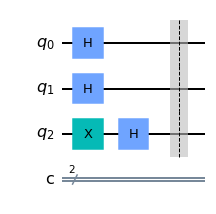

In [125]:
# Build the quantum circuit for our algorithm
circuit = QuantumCircuit(n + 1, n)

# Add Hadamard gates to each of the first n qubits. This results in a superposition of 2^n
# states where the first n qubits correspond to all possible values of an n-bit number
circuit.h(range(n))

# Add a NOT gate to the (n+1)-st qubit, followed by a Hadamard gate, to transform it from
# the inital |0> to the |-> state. This results in a superposition of 2*2^n states, where 
# the first n qubits are the same as above, and the remaining (n+1)-st qubit is in the 
# 1/sqrt(2) * ( |0> - |1> ) state.
circuit.x(n)
circuit.h(n)

circuit.barrier()

# Draw the circuit:
circuit.draw(output = 'mpl')

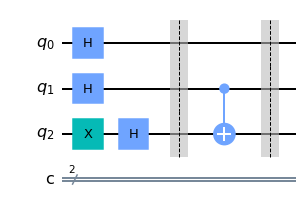

In [126]:
# Build the black box containing the secret number by adding CNOT gates which connect the bits
# in the secret number with value 1 (as controllers) to the (n+1)-st qubit. This acts as the
# quantum equivalent of the function which tells us whether our guess corresponds to the 
# secret number of choice.

for bit, state in enumerate(reversed(secretnumber)): # note that we have to reverse 
    if state == '1':
        circuit.cx(bit, n)

circuit.barrier()

circuit.draw(output = 'mpl')

### The action of the quantum function containing the CNOT gates is to alter the states which are in superposition, such that after we apply the Hadamard transform to the first n qubits again, we get the following state: the first n qubits correspond to our secret number, and the final (n+1)-st qubit is in the |-> state. Therefore, when we measure the first n qubits, we get the secret number as our result qith 100% certainty.

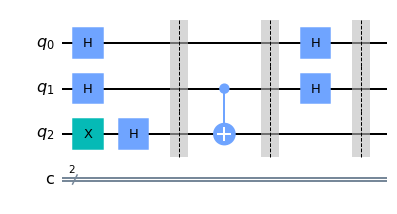

In [127]:
# Add another layer of Hadamard gates to the first n qubits

circuit.h(range(n))

circuit.barrier()

circuit.draw(output = 'mpl')

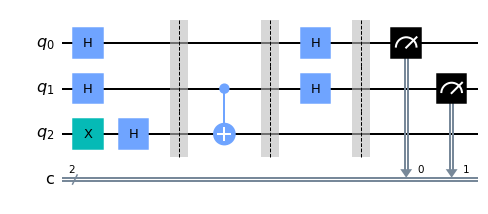

In [128]:
# Measure the states of the first n qubits and store them in the n classical bits

circuit.measure(range(n), range(n))
# circuit.measure([n], [n])

circuit.draw(output = 'mpl')

{'10': 1}
  10


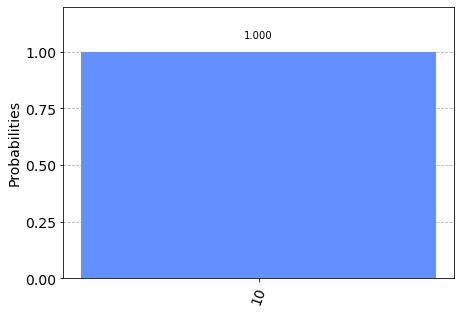

In [130]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)
print("  " + secretnumber)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

#### Why the algorithm works mathematically is explained here: https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html#quantum-solution